In [57]:
!type -a python

python is /opt/tljh/user/bin/python


In [58]:
#pip install numpy

In [59]:
!type -a conda

conda is /opt/tljh/user/bin/conda


In [60]:
!type -a pip

pip is /opt/tljh/user/bin/pip
pip is /usr/bin/pip
pip is /bin/pip


In [61]:
import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install sklearn
#!{sys.executable} -m pip install pandas
# Run this the first time to install pandas. Will need to uncomment sys
!{sys.executable} -m pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import sklearn
import sklearn.datasets as skdata
import pandas as pd
import math

Problem 1.

Hw2-1.csv is a small data set of list prices vs best prices for a new GMC pickup truck in $1000s. The x represents the list price, and the y represents the best price. Complete the following:

1. Determine the Pearson's correlation coefficient between the list price and best price...
2. Establish a linear regr4ession between list price and best price.
3. Based on the relationship you found, determine the best price of a pickup whose list price is 25.2 in $1000s.

In [7]:
# Code to solve problem 1 here
csv1 = pd.read_csv('Hw2-1.csv')
x = pd.read_csv('Hw2-1.csv', usecols=['X']).values
y = pd.read_csv('Hw2-1.csv', usecols=['Y']).values

In [8]:
type(x)

numpy.ndarray

In [9]:
x_mean = x.mean()
y_mean = y.mean()
print('x_mean: ', x_mean)
print('y_mean: ', y_mean)

x_mean:  17.465217391304346
y_mean:  15.3


In [10]:
xPart = x - x_mean
yPart = y - y_mean
spp = sum(x*y)
n = len(x)

In [11]:
def our(n, spp, xP, yP):
    return sum((xP*yP) / math.sqrt(sum(xP**2) * sum(yP**2)))

In [12]:
r = our(n, spp, xPart, yPart)
print(r)

[0.9985405]


In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

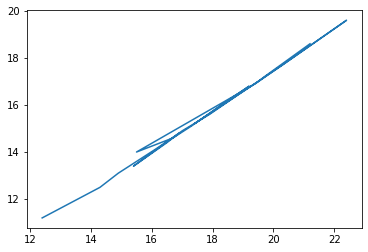

In [14]:
fig, ax = plt.subplots() #create a figure containing a single axis
ax.plot(x,y)

In [15]:
#fig, axs = plt.subplots(2, 2) 
#fig, ax = plt.subplots()

#ax.scatter(data=csv1)

scale:  [79.98995282 72.15447266 29.53639811 16.09458806 20.61255148 13.43253868
 48.06050174 34.25218134 36.29692901 97.29176387 11.09436116 38.82640891
 78.30658753 97.28972601 48.32096053 33.64211054 56.74190362  4.79415097
 38.8937029  90.63036451 16.10182093 74.36211347 63.29741618]


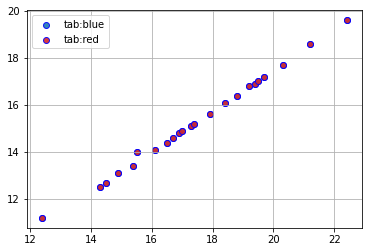

In [16]:
np.random.seed(19680801)

fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:red']:
    n = len(x)
    scale = 100.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=None, label=color,
               alpha=0.9, edgecolors='blue')

ax.legend()
ax.grid(True)
print('scale: ', scale)
plt.show()

In [17]:
b1 = r * (np.std(y)/np.std(x))
print()
b0 = y_mean - b1*(x_mean)
print("hypothesis")
print("y = ", b1, "x +", b0)



hypothesis
y =  [0.851144] x + [0.43458496]


In [18]:
#25.2 in thousands
instance_example = 25.2
prediction_y = b1*instance_example + b0
print(prediction_y)

[21.88341383]


Problem 2. 

Hw2-2.csv contains a fictional dataset about the number of visitors to Asbury Park, NJ, in hundreds a day, the numeber of tickets issued for parking violations, and the average temperature (in Celcius) for the same day.

Use the data set to complete the following:

1. Determine the relationship between the number of visitors and the number of parking tickets issued.
2. Find out the regression coefficient between the temperature and the number of visitors.
3. Look for any possible relationship between the temperature and the number of parking tickets issued.

In [19]:
# Code to solve problem 2 here
csv1 = pd.read_csv('Hw2-2.csv')
a = pd.read_csv('Hw2-2.csv', usecols=['Number of visitors (in hundreds a day)']).values
b = pd.read_csv('Hw2-2.csv', usecols=['Number of parking tickets']).values
c = pd.read_csv('Hw2-2.csv', usecols=['Average Temperature']).values
#print(a)
#print("_________")
#print(b)
#print(len(a)==len(b))
type(csv1)
csv1.corr()

,Number of visitors (in hundreds a day),Number of parking tickets,Average Temperature
Number of visitors (in hundreds a day),1.000000,0.804424,0.681572
Number of parking tickets,0.804424,1.000000,0.807333
Average Temperature,0.681572,0.807333,1.000000


In [20]:
a_mean = a.mean()
b_mean = b.mean()
c_mean = c.mean()
aPart = a - a_mean
bPart = b - b_mean
cPart = c - c_mean
spp_ab = sum(a*b)
spp_ac = sum(a*c)
spp_bc = sum(b*c)
n = len(x)

In [21]:
#r_ab = np.corrcoef(a.astype(float), b.astype(float))
#r_ac = np.corrcoef(a, c)
#r_cb = np.corrcoef(c, b)
#our(n, spp, xP, yP)
r_ab = our(n, spp_ab, aPart, bPart)
r_ac = our(n, spp_ac, aPart, cPart)
r_bc = our(n, spp_bc, bPart, cPart)

In [22]:
print("1. r of nVisitors and parking tickets : ", r_ab)
print("2. r of nVisitors and mean temperature: ", r_ac)
print("3. r of park tickets & avg temperature: " ,r_bc)

1. r of nVisitors and parking tickets :  [0.80442432]
2. r of nVisitors and mean temperature:  [0.68157238]
3. r of park tickets & avg temperature:  [0.80733312]


Problem 3. 
The first line of code loads the diabetes dataset from scikit-learn's toy datasets. More information can be found here: https://scikit-learn.org/stable/datasets/toy_dataset.html

To get the feature names of the dataset back, use "diabetes_data.feature_names". The following are details about some of the attributes. 

s1 tc, total serum cholesterol
s2 ldl, low-density lipoproteins
s3 hdl, high-density lipoproteins
s4 tch, total cholesterol / HDL
s5 ltg, possibly log of serum triglycerides level
s6 glu, blood sugar level

Note: all of these data points have been mean centered and scaled by the standard deviation, so negative value just means below the mean for the data set.

For this dataset, your goal is to find the feature that has the highest Pearson's correlation coefficient when checked against their BMI (BMI and what other column have the highest correlation?). 
Feature with highest Pearson's correlation coefficient to BMI:



Once you have determined the highest correlation, graph the data using matplotlib. If you need help with matplotlib, start be exploring their documentation and tutorials https://matplotlib.org/stable/tutorials/introductory/pyplot.html
Put your code to solve the correlation in the next cell, and your code to generate a graph in the following

In [65]:
# Put your code here to solve the correlation problem
diabetes_data = skdata.load_diabetes()
#print(diabetes_data)
print(diabetes_data.feature_names)
type(diabetes_data.data)
#test = diabetes_data[:,1]

feature_colnames = diabetes_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [66]:
features = diabetes_data.feature_names
df = pd.DataFrame(diabetes_data.data, columns=feature_colnames)
rMatrix = df.corr()
rBMI = rMatrix['bmi']
vals = rBMI.values
m = 0
c = 0

def maximum(v, m):
    for i in range(len(v)):
        if (i != 2 and v[i] > m):
            m = v[i]
            c = i
    return c


r_col = maximum(vals, m)
print("best correlated feature with BMI: ",features[r_col], ": ", vals[r_col])

best correlated feature with BMI:  s5 :  0.4461586482466502


In [67]:
# Put your code here to generate your graph
"""copyFeatures = features
a = rBMI.values
type(a)
b = np.delete(a, 2)
correlations = np.sort(b)
print(c)
f = copyFeatures.remove('bmi')
print(features)"""

"copyFeatures = features\na = rBMI.values\ntype(a)\nb = np.delete(a, 2)\ncorrelations = np.sort(b)\nprint(c)\nf = copyFeatures.remove('bmi')\nprint(features)"

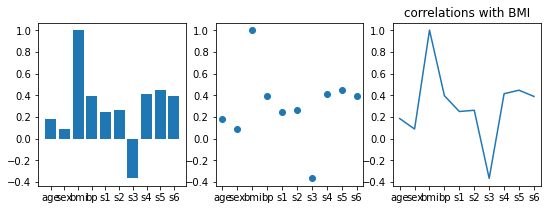

In [69]:
names = diabetes_data.feature_names
values = vals


plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.title('correlations with BMI')
plt.show()


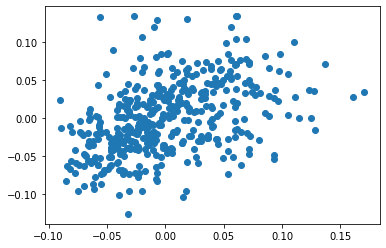

In [60]:
plt.scatter(df['bmi'], df['s5'])


In [82]:
z = np.vstack((vals, names))
rDictionary = {}
def makeDict(npArr, dictionary):
    for i in npArr:
        #rDictionary[key] = value
        rDictionary[]

['0.1850846661465558' '0.08816139902276221' '0.9999999999999996'
 '0.39541532116226696' '0.24977742174241233' '0.26116991116442567'
 '-0.3668109784050296' '0.4138066018314405' '0.4461586482466502'
 '0.38867999390003916']
['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']


In [29]:
r_matrix = df.corr()

r_bmi = r_matrix.loc[:, 'bmi']


#test = df.corr()['bmi']
#r = corr_w_bmi.sort_values

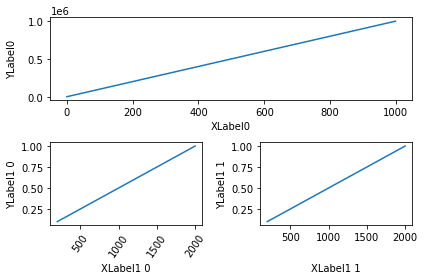

In [62]:
import matplotlib.gridspec as gridspec
fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(np.arange(0, 1e6, 1000))
ax.set_ylabel('YLabel0')
ax.set_xlabel('XLabel0')

for i in range(2):
    ax = fig.add_subplot(gs[1, i])
    ax.plot(np.arange(1., 0., -0.1) * 2000., np.arange(1., 0., -0.1))
    ax.set_ylabel('YLabel1 %d' % i)
    ax.set_xlabel('XLabel1 %d' % i)
    if i == 0:
        for tick in ax.get_xticklabels():
            tick.set_rotation(55)
fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

plt.show()